In [ ]:
!unzip Datasets.zip

unzip:  cannot find or open Datasets.zip, Datasets.zip.zip or Datasets.zip.ZIP.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import datetime
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import pickle

In [ ]:
df_cab = pd.read_csv('cab_rides.csv')
df_cab.reset_index(drop=True, inplace=True)

In [ ]:
print("Taxi fare dataset\n")
print(df_cab.info())

print("Shape ", df_cab.shape)

df_cab = df_cab.iloc[:, :]
print("\n", df_cab.head(2))
print("\n", df_cab.describe())

Taxi fare dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212916 entries, 0 to 212915
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          212916 non-null  float64
 1   cab_type          212916 non-null  object 
 2   time_stamp        212916 non-null  int64  
 3   destination       212916 non-null  object 
 4   source            212916 non-null  object 
 5   price             196053 non-null  float64
 6   surge_multiplier  212915 non-null  float64
 7   id                212915 non-null  object 
 8   product_id        212915 non-null  object 
 9   name              212915 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 16.2+ MB
None
Shape  (212916, 10)

    distance cab_type     time_stamp    destination            source  price  \
0      0.44     Lyft  1544952607890  North Station  Haymarket Square    5.0   
1      0.44     Lyft  1543284023677  North Sta

In [ ]:
df_weather = pd.read_csv('weather.csv')

In [ ]:
print("Weather dataset\n")
print(df_weather.info())

print("Shape ", df_weather.shape)

df_weather = df_weather.iloc[:, :]
print("\n", df_weather.head(2))
print("\n", df_weather.describe())

Weather dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB
None
Shape  (6276, 8)

     temp     location  clouds  pressure    rain  time_stamp  humidity   wind
0  42.42     Back Bay     1.0   1012.14  0.1228  1545003901      0.77  11.25
1  42.43  Beacon Hill     1.0   1012.15  0.1846  1545003901      0.76  11.32

               temp       clouds     pressure        rain    time_stamp  \
count  6276.000000  6276.000000  6276.000000  894.000000  6.276000e+03  

In [ ]:
print("Checking null values: \n", df_cab.isnull().sum())

# convert 13digit time stamp to datetime format
df_cab['date_time']= pd.to_datetime(df_cab['time_stamp']/1000, unit='s')
df_cab['date']= df_cab['date_time'].dt.date
df_cab['day'] = df_cab.date_time.dt.dayofweek
df_cab['hour'] = df_cab.date_time.dt.hour

df_cab['fare_per_mile']= round(df_cab.price/df_cab.distance,2)

del df_cab['time_stamp'] # deleting unwanted time_stamp

df_cab['fare_per_mile'] = df_cab['fare_per_mile'].astype(float)
df_cab['fare_per_mile'].fillna('2.8',inplace=True)
# df_cab['price'] = df_cab['fare_per_mile'] * df_cab['distance']

Checking null values: 
 distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               16863
surge_multiplier        1
id                      1
product_id              1
name                    1
dtype: int64


<ipython-input-7-3d50da0c7029>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cab['fare_per_mile'].fillna('2.8',inplace=True)
<ipython-input-7-3d50da0c7029>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.8' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cab['fare_per_mile'].fillna('2.8',inplace=True)


In [ ]:
df_cab['fare_per_mile'] = df_cab['fare_per_mile'].astype(float)
print(df_cab['fare_per_mile'].dtype)

float64


In [ ]:
df_cab['price'] = df_cab['fare_per_mile'] * df_cab['distance']

In [ ]:
print("Checking null values: \n", df_weather.isnull().sum())

df_weather['rain'].fillna(0, inplace = True)
df_weather['date_time'] = pd.to_datetime(df_weather['time_stamp'], unit='s')
del df_weather['time_stamp']

Checking null values: 
 temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64


<ipython-input-10-82d558a1f1e5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather['rain'].fillna(0, inplace = True)


In [ ]:
df_cab['merge_date'] = df_cab.source.astype(str) +" - "+ df_cab.date_time.dt.date.astype("str") +" - "+ df_cab.date_time.dt.hour.astype("str")
df_weather['merge_date'] = df_weather.location.astype(str) +" - "+ df_weather.date_time.dt.date.astype("str") +" - "+ df_weather.date_time.dt.hour.astype("str")

df_weather = df_weather.groupby(['merge_date'])
columns_to_mean = ['temp', 'clouds', 'pressure', 'rain', 'humidity', 'wind']
df_weather = df_weather[columns_to_mean].mean()
df_weather.reset_index(inplace=True)

In [ ]:
df_merged = pd.merge(df_cab, df_weather, on='merge_date')
print("Shape after merging both datasets", df_merged.shape)

# Removing unwanted columns
df_merged = df_merged.drop(['date_time','id','product_id','fare_per_mile','surge_multiplier','destination','source','date'], axis=1)
df_merged = df_merged.loc[:, df_merged.columns !='merge_date']

# final_dataset = df_merged.drop(['cab_type'],axis=1)
final_dataset = df_merged
final_dataset.info()

Shape after merging both datasets (211969, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211969 entries, 0 to 211968
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   distance  211969 non-null  float64
 1   cab_type  211969 non-null  object 
 2   price     211969 non-null  float64
 3   name      211969 non-null  object 
 4   day       211969 non-null  int32  
 5   hour      211969 non-null  int32  
 6   temp      211969 non-null  float64
 7   clouds    211969 non-null  float64
 8   pressure  211969 non-null  float64
 9   rain      211969 non-null  float64
 10  humidity  211969 non-null  float64
 11  wind      211969 non-null  float64
dtypes: float64(8), int32(2), object(2)
memory usage: 17.8+ MB


In [ ]:
final_dataset.describe()

,distance,price,day,hour,temp,clouds,pressure,rain,humidity,wind
count,690107.000000,690107.000000,690107.000000,690107.000000,690107.000000,690107.000000,690107.000000,690107.000000,690107.000000,690107.000000
mean,2.189020,15.716457,2.788220,11.637168,39.207020,0.670014,1010.235349,0.006648,0.748341,6.937647
std,1.138874,9.423910,2.058904,6.945158,6.605343,0.312359,13.372665,0.031376,0.128922,3.645616
min,0.020000,0.056000,0.000000,0.000000,19.620000,0.000000,988.325000,0.000000,0.450000,0.300000
25%,1.280000,8.502300,1.000000,6.000000,36.050000,0.430000,999.950000,0.000000,0.650000,3.610000
50%,2.160000,13.493800,3.000000,12.000000,40.180000,0.760000,1009.450000,0.000000,0.730000,6.740000
75%,2.920000,22.491000,5.000000,18.000000,43.805000,0.960000,1021.870000,0.000000,0.875000,9.852500
max,7.860000,97.504300,6.000000,23.000000,55.410000,1.000000,1035.120000,0.359825,0.990000,18.180000


In [ ]:
final_dataset.iloc[0:10]

,distance,cab_type,price,name,day,hour,temp,clouds,pressure,rain,humidity,wind
0,0.44,Lyft,4.9984,Shared,6,9,38.46000,0.290000,1022.25000,0.000,0.760000,7.68000
1,0.44,Lyft,11.0000,Lux,1,2,44.06500,0.995000,1002.88000,0.106,0.895000,12.63000
2,0.44,Lyft,25.9996,Lux Black XL,4,4,35.08000,0.000000,1013.71000,0.000,0.700000,5.25000
3,0.44,Lyft,8.9980,Lyft XL,3,3,37.68000,0.433333,998.42000,0.000,0.706667,11.16000
4,0.44,Lyft,16.5000,Lux Black,0,18,40.78000,0.930000,1000.15000,0.000,0.790000,7.55000
5,1.08,Lyft,10.4976,Lyft XL,0,5,40.56125,0.930000,1013.82125,0.000,0.921250,2.49625
6,1.08,Lyft,16.5024,Lux Black,6,19,50.49000,1.000000,1004.05000,0.000,0.920000,2.46000
7,1.08,Lyft,3.0024,Shared,0,6,44.85000,0.890000,1000.70000,0.000,0.950000,1.53000
8,1.08,Lyft,27.4968,Lux Black XL,1,10,44.75500,0.990000,990.82500,0.015,0.965000,6.00500
9,1.08,Lyft,13.5000,Lux,4,16,41.78000,0.150000,1016.57000,0.000,0.570000,2.51000


In [ ]:
final_dataset.to_csv('final_dataset.csv')

In [ ]:
def labelEncoding(dataset):
  string_cols = dataset.select_dtypes(include=['object']).columns
  for col in string_cols:
    label_transformer = preprocessing.LabelEncoder()
    label_transformer.fit(dataset[col])
    dataset[col] = label_transformer.transform(dataset[col])
  return dataset

In [ ]:
label_transformer = preprocessing.LabelEncoder()
label_transformer.fit(final_dataset['name'])
final_dataset['name'] = label_transformer.transform(final_dataset['name'])

correlation_matrix = final_dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

In [ ]:
data = final_dataset

# features = ['temp', 'clouds', 'pressure', 'rain', 'humidity', 'wind']
features = ['distance']
target = 'price'

data = data.dropna(subset=features + [target])

# Split data into features (X) and target (y)
X = data[features]
y = data[target]

In [ ]:
# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
regressor = DecisionTreeRegressor(random_state=42, min_samples_leaf=10, min_samples_split=2, max_depth=10)

regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error

dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': [None, 'sqrt', 'log2']
}

scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Output the best parameters and their performance
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validated MSE:", -grid_search.best_score_)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-Validated MSE: 77.9799453499489


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 7.122247138680395
Mean Squared Error (MSE): 76.93075757146242
Root Mean Squared Error (RMSE): 8.77101804646772
R² Score: 0.12773749636229204


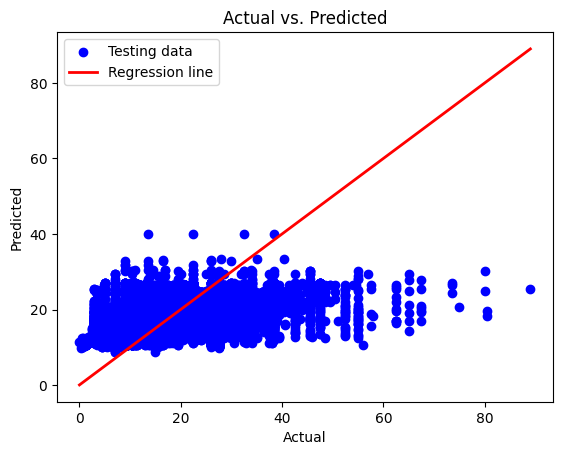

In [ ]:
plt.scatter(y_test, y_pred, color='blue', label='Testing data')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', linewidth=2, label='Regression line')

plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.show()

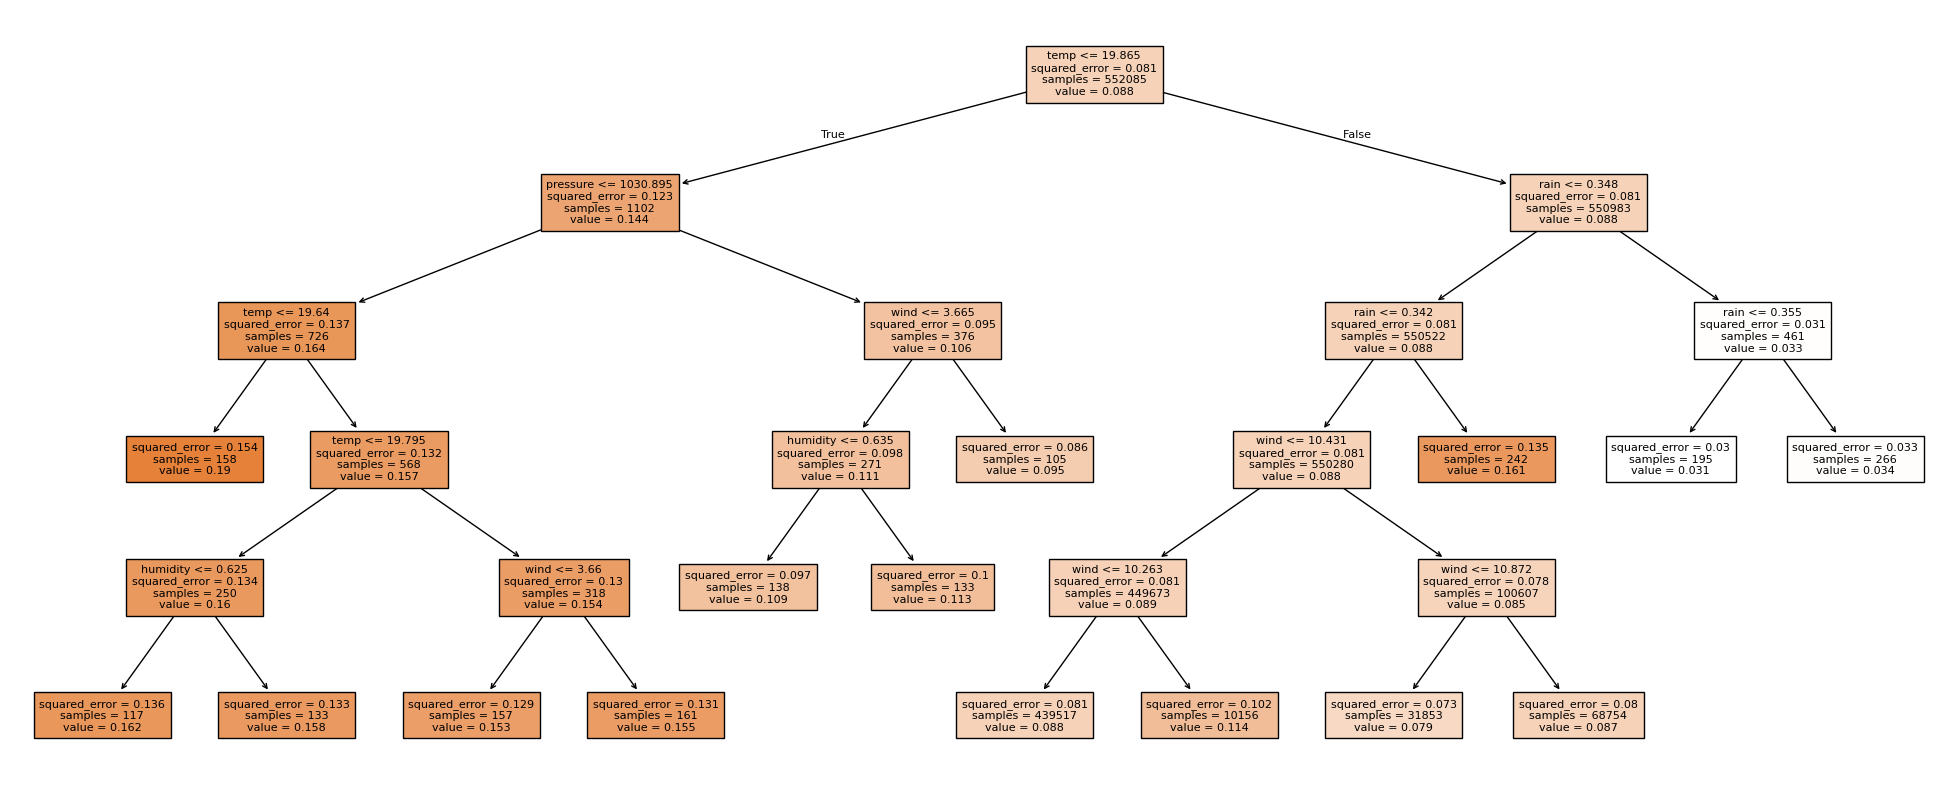

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

plt.figure(figsize=(25,10))
plot_tree(regressor, feature_names=features, filled=True, fontsize=8)
plt.show()

In [ ]:
importances = regressor.feature_importances_

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

    Feature  Importance
5      wind    0.569938
0      temp    0.218154
3      rain    0.162618
2  pressure    0.049147
4  humidity    0.000143
1    clouds    0.000000


Correlation between wind and price: -0.000344623934838298


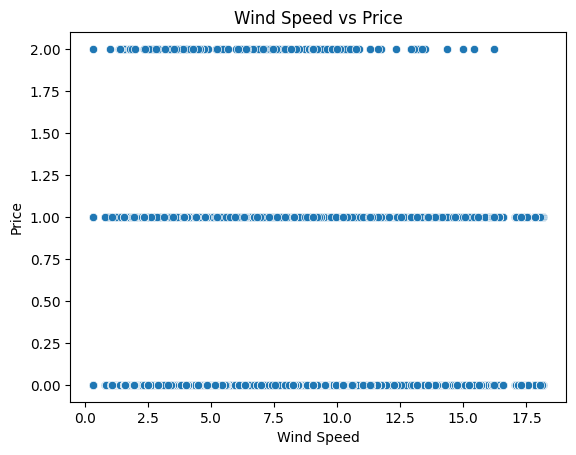

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation between wind and price
correlation = X['wind'].corr(y)
print(f"Correlation between wind and price: {correlation}")

# Plot the relationship between wind and price
sns.scatterplot(x=X['wind'], y=y)
plt.xlabel('Wind Speed')
plt.ylabel('Price')
plt.title('Wind Speed vs Price')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation with decision tree regressor
cross_val_scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE:", np.mean(np.abs(cross_val_scores)))


Cross-validation MSE: 88.77454520129551


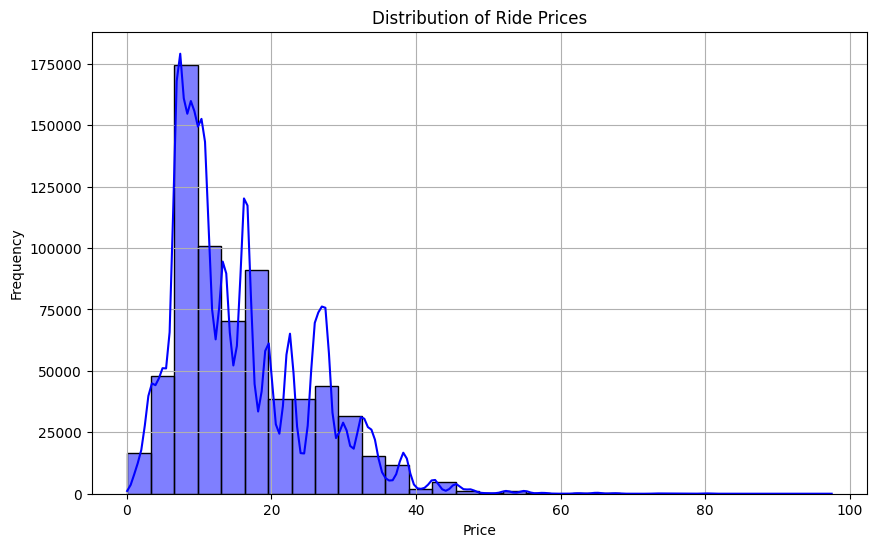

In [ ]:
import seaborn as sns

# Create a histogram to visualize the distribution of price
plt.figure(figsize=(10,6))
sns.histplot(y, kde=True, bins=30, color='blue')
plt.title('Distribution of Ride Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# XgBoost Model

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

num_boost_round = 1000
XgboostModel = xgb.train(params, dtrain, num_boost_round=num_boost_round)

y_pred = XgboostModel.predict(dtest)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Mean Absolute Percentage Error: ', MAPE)
print('\nFinal Accuracy: ', 100 - MAPE)

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Test R²:", r2)
print("Test MSE:", mse)